# TASK 3- Text clustering

In [1]:
# Import needed libraries
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 1. Take documents from three additional directories

In [2]:
# Define function to read documents from folders
def read_documents_from_folders(folder_paths):
    documents = []
    labels = []
    
    # Tokenization and stemming function
    def tokenize_and_stem(text):
        stemmer = PorterStemmer() 
        tokens = word_tokenize(text) 
        stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Stem each token
        return ' '.join(stemmed_tokens)  # Join stemmed tokens back into a string

    for label, folder_path in enumerate(folder_paths):
        for filename in os.listdir(folder_path):
            with open(os.path.join(folder_path, filename), 'r', encoding='latin-1') as file:
                document = file.read()
                stemmed_document = tokenize_and_stem(document)  # Tokenize and stem the document
                documents.append(stemmed_document)
                labels.append(folder_names[label])
    return documents, labels

# Folder paths and names
folder_paths = [r"C:\Users\anate\IRProject\Train and Test",
                r"C:\Users\anate\IRProject\Negative examples",
                r"C:\Users\anate\IRProject\AI explainability",
                r"C:\Users\anate\IRProject\Algorithmic fairness"]

folder_names = ['Social Bias', 'Bias Mitigation', 'AI Explainability', 'Algorithmic Fairness']

# Read documents from folders and perform tokenization and stemming
documents, labels = read_documents_from_folders(folder_paths)


## 2.  Machine learning

### a. Perform clustering using K-means and 4 clusters

In [3]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Reduce dimensions to 2D using Truncated SVD for visualization
lsa = TruncatedSVD(n_components=2, random_state=0)
X_lsa_before = lsa.fit_transform(X)

# Perform K-means clustering
num_clusters = 4  # Adjust number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, n_init=30, random_state=0).fit(X)


# Get cluster assignments for each document
cluster_labels = kmeans.labels_

# Transform data to reduced 2D space for visualization
X_lsa_after = lsa.transform(X)
centroids_lsa = lsa.transform(kmeans.cluster_centers_)

### b. Analyze the results

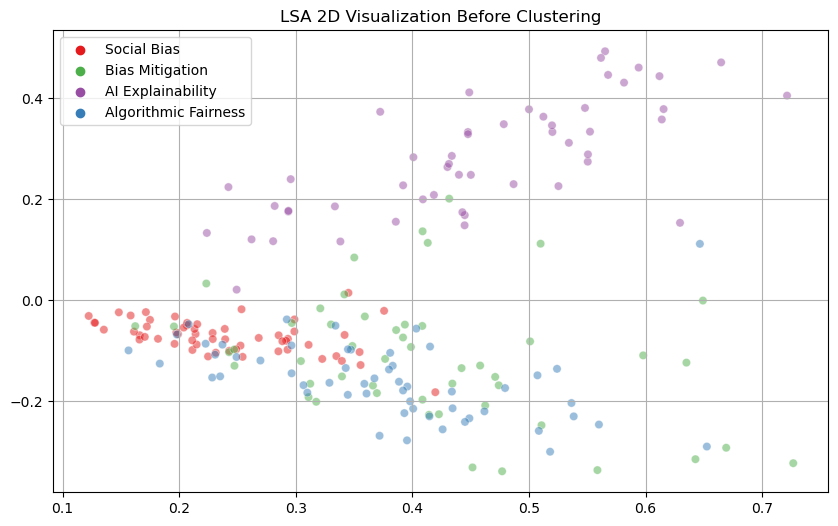

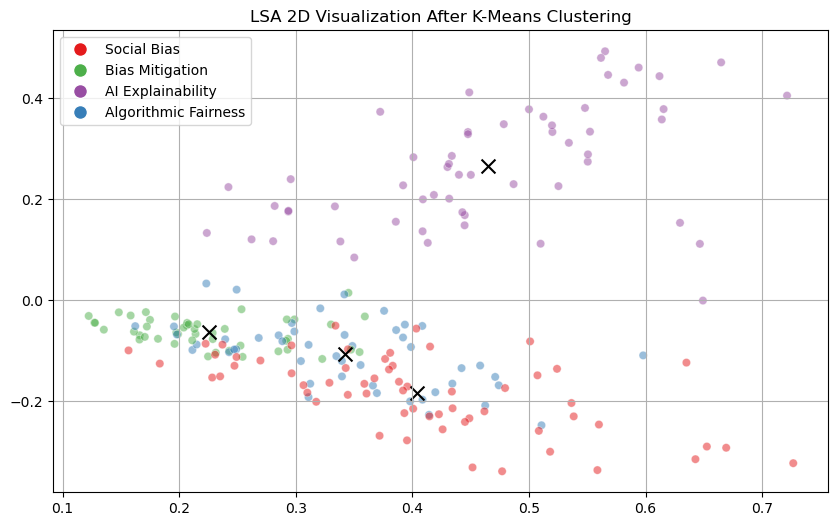

In [4]:
import pandas as pd

# Define a color palette for both true labels and cluster labels
true_label_colors = sns.color_palette('Set1', len(set(labels)))
cluster_label_colors = sns.color_palette('Set1', num_clusters)

# Create a dictionary to map true labels to colors
true_label_color_map = {label: color for label, color in zip(set(labels), true_label_colors)}

# Create a dictionary to map cluster labels to colors based on true labels
cluster_label_color_map = {label: true_label_color_map[folder_names[label]] for label in range(num_clusters)}

# Plot documents before clustering using consistent colors for true labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lsa_before[:, 0], y=X_lsa_before[:, 1], hue=labels, palette=true_label_color_map, alpha=0.5)
plt.title(f"LSA 2D Visualization Before Clustering")
plt.grid(True)
plt.show()

# Convert the values of the cluster_label_color_map dictionary to a list
cluster_label_colors = list(cluster_label_color_map.values())

# Plot documents after K-means clustering using consistent colors for true labels
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=X_lsa_after[:, 0], y=X_lsa_after[:, 1], hue=cluster_labels, palette=cluster_label_colors, alpha=0.5)
plt.scatter(centroids_lsa[:, 0], centroids_lsa[:, 1], marker='x', s=100, color='black', label='Centroids')
plt.title('LSA 2D Visualization After K-Means Clustering')

# Create custom legend handles with specified colors for cluster labels
legend_handles = []
for label, color in cluster_label_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=folder_names[label]))
centroid_handle = plt.Line2D([0], [0], marker='x', color='w', markersize=10, markerfacecolor='black', label='Centroids')
legend_handles.append(centroid_handle)

# Add legend with custom handles for cluster labels
plt.legend(handles=legend_handles[ :-1])

plt.grid(True)
plt.show()


### Aditional visualization for analyze - PCA 2D Visualization

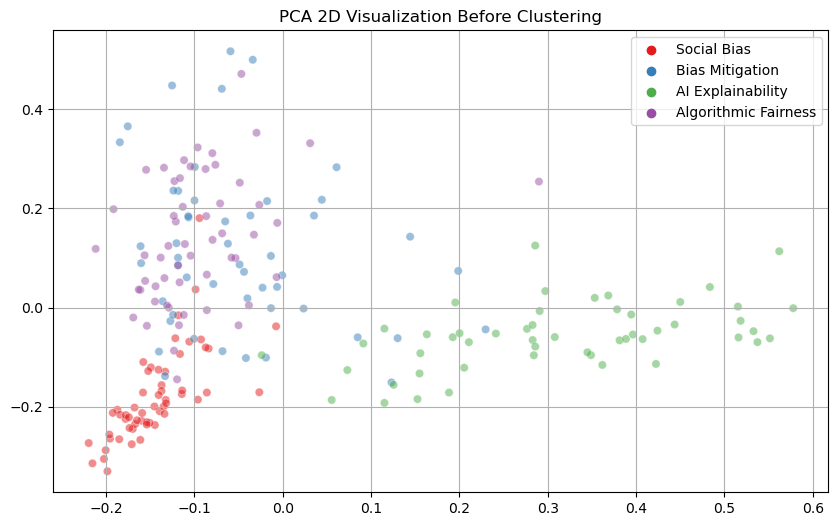

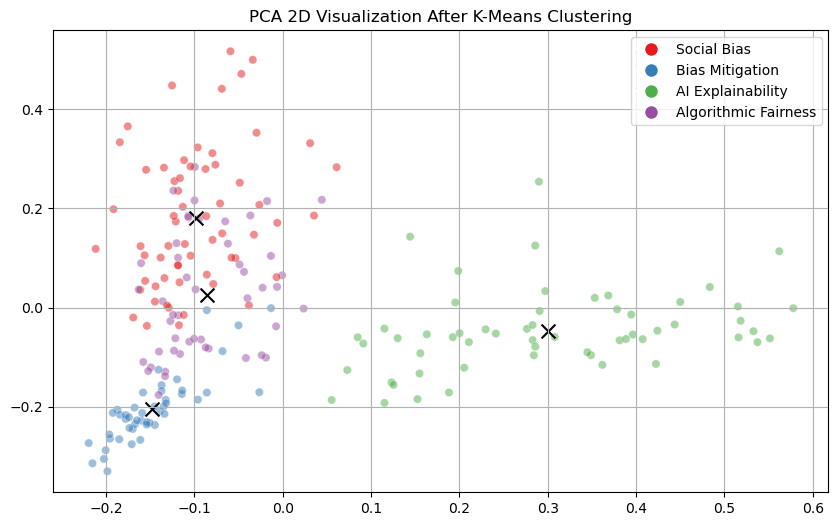

In [5]:
from sklearn.decomposition import PCA
# Reduce dimensions to 2D using PCA 
pca = PCA(n_components=2, random_state=0)
X_dense = X.toarray()  # Convert sparse matrix to dense array
X_pca_before = pca.fit_transform(X_dense)

# Plot documents before clustering 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_before[:, 0], y=X_pca_before[:, 1], hue=labels, palette='Set1', alpha=0.5)
plt.title('PCA 2D Visualization Before Clustering')
plt.grid(True)
plt.show()

# Perform K-means clustering
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, n_init=30, random_state=0).fit(X)

# Get cluster assignments for each document
cluster_labels = kmeans.labels_

# Transform data to reduced 2D space
X_pca_after = pca.transform(X_dense)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot documents after K-means clustering
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=X_pca_after[:, 0], y=X_pca_after[:, 1], hue=cluster_labels, palette='Set1', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=100, color='black', label='Centroids')
plt.title('PCA 2D Visualization After K-Means Clustering')

# Create custom legend handles with specified colors
colors = sns.color_palette('Set1', num_clusters)
legend_handles = []
for label, folder_name, color in zip(range(num_clusters), folder_names, colors):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=folder_name))
centroid_handle = plt.Line2D([0], [0], marker='x', color='w', markersize=10, markerfacecolor='black', label='Centroids')
legend_handles.append(centroid_handle)

# Add legend with custom handles
plt.legend(handles=legend_handles[ :-1])

plt.grid(True)
plt.show()


#### Acuraccy calculation

In [6]:
from collections import defaultdict
from sklearn.metrics import accuracy_score

# Create a dictionary to map cluster labels to true labels
cluster_to_true_label = defaultdict(lambda: defaultdict(int))

# Iterate over each document and populate the cluster_to_true_label dictionary
for true_label, cluster_label in zip(labels, cluster_labels):
    cluster_to_true_label[cluster_label][true_label] += 1

# Assign each cluster label to the true label with the highest count
cluster_to_assigned_label = {}
for cluster_label, true_label_counts in cluster_to_true_label.items():
    assigned_label = max(true_label_counts, key=true_label_counts.get)
    cluster_to_assigned_label[cluster_label] = assigned_label

# Map cluster labels to assigned true labels
assigned_true_labels = [cluster_to_assigned_label[cluster_label] for cluster_label in cluster_labels]

# Compute accuracy
accuracy = accuracy_score(labels, assigned_true_labels)
print("Accuracy:", accuracy)


Accuracy: 0.8028169014084507


#### Evulation methods

In [7]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score,homogeneity_completeness_v_measure,accuracy_score

# Compute Adjusted Rand Index
ari = adjusted_rand_score(labels, cluster_labels)
print("Adjusted Rand Index:", ari)

# Compute Adjusted Mutual Information
ami = adjusted_mutual_info_score(labels, cluster_labels)
print("Adjusted Mutual Information:", ami)

# Compute Homogeneity, Completeness, and V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels, cluster_labels)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)

Adjusted Rand Index: 0.591943085278994
Adjusted Mutual Information: 0.6035876596287357
Homogeneity: 0.6087285138305296
Completeness: 0.6108206237049182
V-measure: 0.609772774283356
